In [1]:
import plotly.express as px
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [2]:
# Fit and transform dataframe using MinMaxScaler
def scale_df(df):
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df))
    df_scaled.columns = df.columns
    df_scaled.index = df.index
    return df_scaled, scaler

In [3]:
# Transform a dataframe using a scaler that has already been fit
def transform_df(scaler, df):
    df_scaled = pd.DataFrame(scaler.transform(df))
    df_scaled.columns = df.columns
    df_scaled.index = df.index
    return df_scaled

In [4]:
merged_tube = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/TUBE_merge_1.csv'),
                  index_col=0)
merged_pipe = pipe = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/PIPE_merge_1.csv'),
                  index_col=0)

# Absorptions are highly correlated so only use one
merged_tube = merged_tube.drop(columns=['A','Absorption_avg_500','Absorption_std_500','Absorption_avg_200','Absorption_std_200'])
merged_pipe = merged_pipe.drop(columns=['A','Absorption_avg_100','Absorption_std_100'])


In [5]:
#
data_tube = merged_tube[["TEP_mean_uV_C","backscatter_avg","Absorption_avg_50","median_CF","median_perm","median_MBN"]]
merged_tube_errors = merged_tube[["TEP_error_uV_C","backscatter_std","Absorption_std_50"]]
for col in "cf_std","mbn_std","perm_std":
    merged_tube_errors[col] = 0

# 
data_tube_min_boundary = data_tube - merged_tube_errors.values
data_tube_max_boundary = data_tube + merged_tube_errors.values

scaled_tube, scaler = scale_df(data_tube)
scaled_tube_min_boundary = transform_df(scaler, data_tube_min_boundary)
scaled_tube_max_boundary = transform_df(scaler, data_tube_max_boundary)
scaled_tube['condition'] = scaled_tube.index
scaled_tube_min_boundary['condition'] = scaled_tube.index
scaled_tube_max_boundary['condition'] = scaled_tube.index


/home/nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
data_tube

,TEP_mean_uV_C,backscatter_avg,Absorption_avg_50,median_CF,median_perm,median_MBN
T_B1,12.947951,0.0175,0.001264,1.1000,68.50,0.4730
T_B2,12.920068,0.0240,0.002486,1.1095,66.45,0.6305
T_B3,12.932865,0.0134,0.001168,1.0795,68.40,0.5765
T_B4,10.763517,0.0146,0.002084,4.5140,32.90,0.5005
T_B5,12.942958,0.0182,0.001141,1.4290,64.95,0.5380
T_B6,11.037827,0.0148,0.001323,4.6720,34.05,0.3010
T_B7,12.882150,0.0300,0.001908,0.6580,103.55,0.6075
T_B8,12.257788,0.0269,0.000933,2.0400,57.80,0.3745
T_AR,12.947031,0.0179,0.001257,1.2355,61.85,0.5940
T_N,10.805126,0.0253,0.003128,4.4960,33.40,0.5915


In [7]:
data_tube_min_boundary

,TEP_mean_uV_C,backscatter_avg,Absorption_avg_50,median_CF,median_perm,median_MBN
T_B1,12.874839,0.0133,0.000745,1.1000,68.50,0.4730
T_B2,12.842254,0.0183,0.001670,1.1095,66.45,0.6305
T_B3,12.844103,0.0106,0.000613,1.0795,68.40,0.5765
T_B4,10.692344,0.0115,0.001436,4.5140,32.90,0.5005
T_B5,12.868150,0.0142,0.000694,1.4290,64.95,0.5380
T_B6,10.947191,0.0117,0.000749,4.6720,34.05,0.3010
T_B7,12.783084,0.0213,0.000982,0.6580,103.55,0.6075
T_B8,12.176868,0.0207,0.000629,2.0400,57.80,0.3745
T_AR,12.857244,0.0141,0.001047,1.2355,61.85,0.5940
T_N,10.728284,0.0199,0.001981,4.4960,33.40,0.5915


Text(0.5, 1.0, 'Tubes')

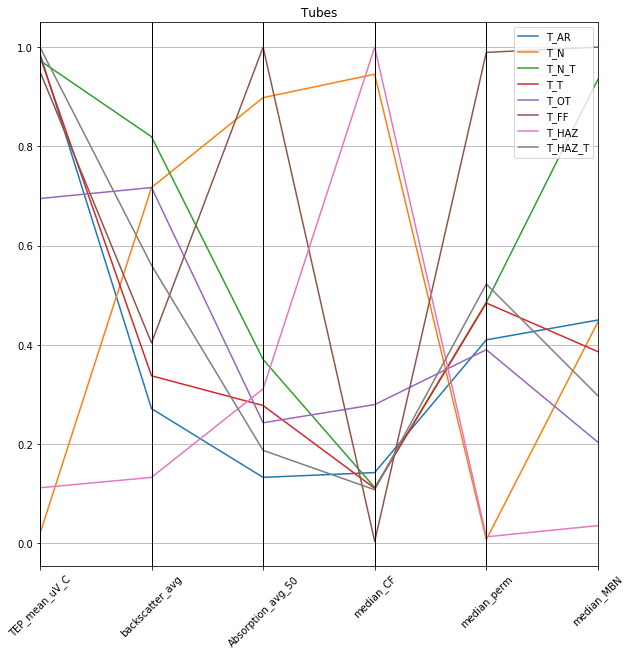

In [8]:
#fig = px.parallel_coordinates(scaled_tube.iloc[8:16,],color="condition")
#plt.clf()
plt.figure(figsize=(10,10))
parallel_coordinates(scaled_tube.iloc[8:16,],class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
#parallel_coordinates(scaled_tube_max_boundary.iloc[8:16,],class_column="condition", alpha=.2,color=matplotlib.colors.TABLEAU_COLORS)
#parallel_coordinates(scaled_tube_min_boundary.iloc[8:16,],class_column="condition", alpha=.2,color=matplotlib.colors.TABLEAU_COLORS)
plt.xticks(rotation=45)
plt.title("Tubes")
#fig.show()

Text(0.5, 1.0, 'Tubes')

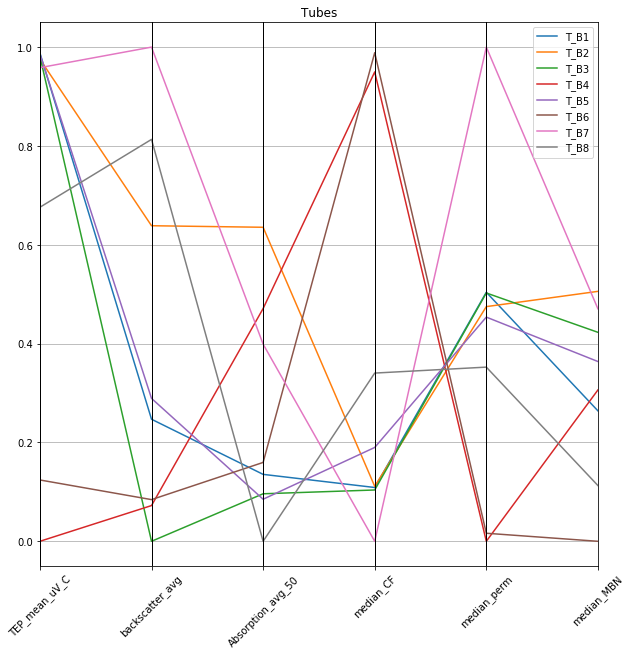

In [9]:

plt.figure(figsize=(10,10))
parallel_coordinates(scaled_tube.iloc[:8,],class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
plt.xticks(rotation=45)
plt.title("Tubes")


Text(0.5, 1.0, 'Pipes')

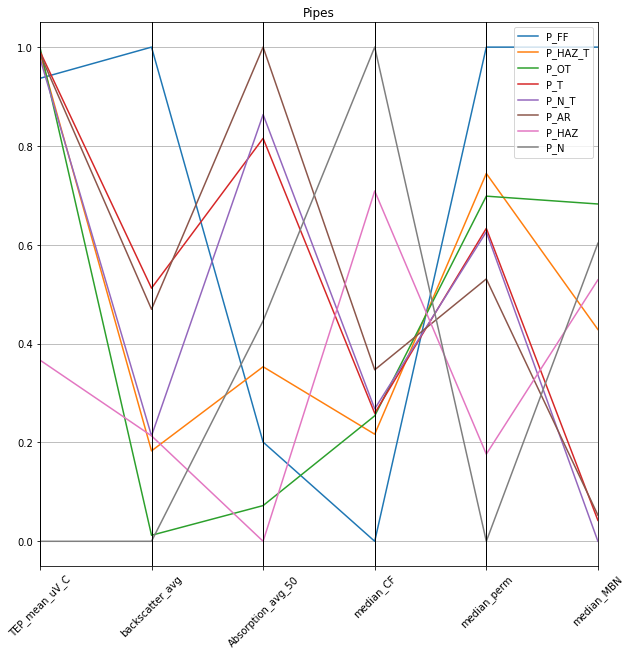

In [10]:
data_pipe = merged_pipe[["TEP_mean_uV_C","backscatter_avg","Absorption_avg_50","median_CF","median_perm","median_MBN"]]
scaled_pipe, scaler = scale_df(data_pipe)
scaled_pipe['condition'] = data_pipe.index

plt.figure(figsize=(10,10))
parallel_coordinates(scaled_pipe,class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
plt.xticks(rotation=45)
plt.title("Pipes")


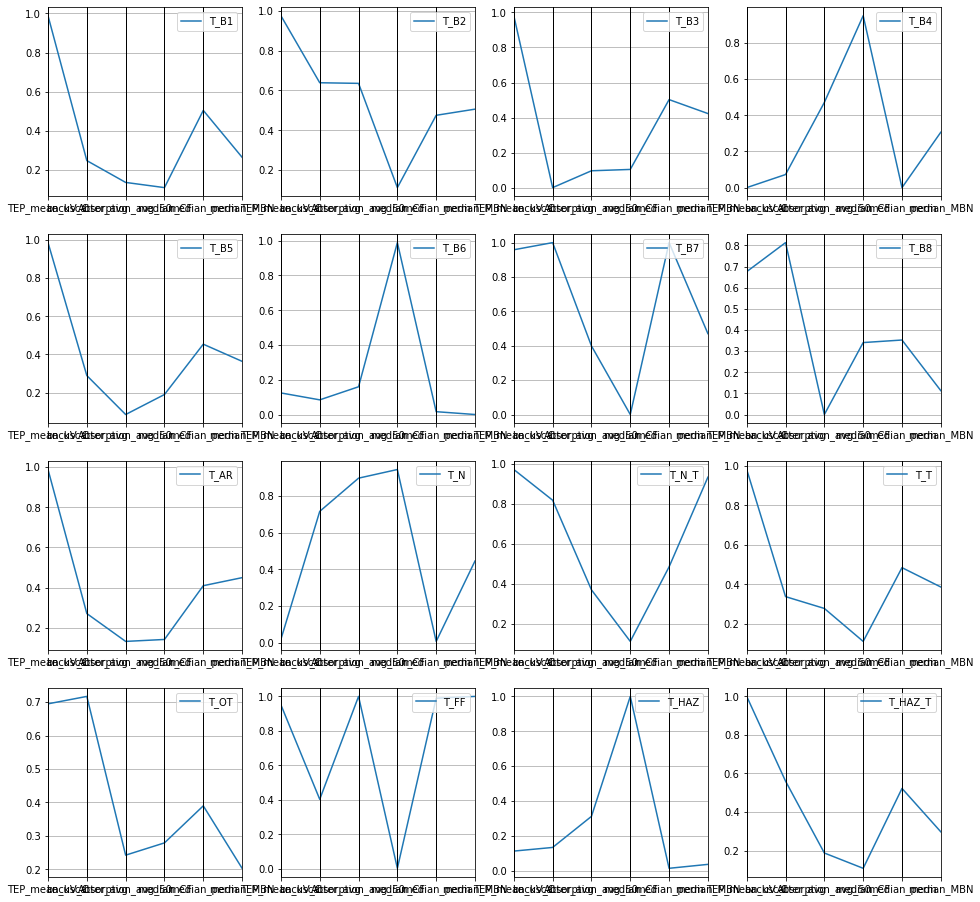

In [11]:
plt.figure(figsize=(16,16))
#plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    parallel_coordinates(scaled_tube.iloc[i:(i+1),],class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
    #plt.show()
    #plt.xticks(rotation=45)
#plt.title("Tubes")
#plt